In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time 
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(82.2537865089864, 149.4155110301632), (29.794846602048665, 66.44292080883932), (-74.70376340751729, 28.183875550634866), (18.8001264542344, -43.54390558772977), (64.05664883469296, -26.852906502652303), (-15.591087950188395, -85.87413226957707), (25.09421299026839, -135.18686649983613), (38.19962546972553, -134.12235435363874), (84.23663476788235, -133.5202803833243), (25.81092416933174, 6.200411885070622), (29.691024773263464, 127.3771520719431), (37.921041230640625, -101.6034426306514), (36.986152169772026, 56.00328568267702), (-31.109495708163102, -85.9582259424516), (-85.44861462765863, -75.86820184425106), (79.40846277609285, 85.34823706232208), (1.4152121279986432, -155.4327195862453), (5.704466145282112, 170.55472612991753), (-16.653109339713808, 33.21262598230973), (-33.095766354326166, -48.712303375191425), (-39.29007145852302, 60.84303317335926), (-12.32169261817144, -44.363010310702805), (-42.77017126984982, -82.11561325046463), (-27.77881674029868, -120.66556119185476), (

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

82.2537865089864 149.4155110301632
29.794846602048665 66.44292080883932
-74.70376340751729 28.183875550634866
18.8001264542344 -43.54390558772977
64.05664883469296 -26.852906502652303
-15.591087950188395 -85.87413226957707
25.09421299026839 -135.18686649983613
38.19962546972553 -134.12235435363874
84.23663476788235 -133.5202803833243
25.81092416933174 6.200411885070622
29.691024773263464 127.3771520719431
37.921041230640625 -101.6034426306514
36.986152169772026 56.00328568267702
-31.109495708163102 -85.9582259424516
-85.44861462765863 -75.86820184425106
79.40846277609285 85.34823706232208
1.4152121279986432 -155.4327195862453
5.704466145282112 170.55472612991753
-16.653109339713808 33.21262598230973
-33.095766354326166 -48.712303375191425
-39.29007145852302 60.84303317335926
-12.32169261817144 -44.363010310702805
-42.77017126984982 -82.11561325046463
-27.77881674029868 -120.66556119185476
9.73670327243184 81.58386016914608
50.32879136754934 177.23074567937624
69.31417302937052 -164.237

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a657a068f2519756da70afb179517fcf


Beginning Data Retrieval     
-----------------------------


In [10]:
# List of city data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | mastung
Processing Record 3 of Set 1 | kruisfontein
Processing Record 4 of Set 1 | sinnamary
Processing Record 5 of Set 1 | olafsvik
Processing Record 6 of Set 1 | hualmay
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | gat
Processing Record 11 of Set 1 | naze
Processing Record 12 of Set 1 | garden city
Processing Record 13 of Set 1 | kalaleh
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | tete
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | sao desiderio
Processing Record 23 of Set 1 | castro
Processing

Processing Record 35 of Set 4 | clyde river
Processing Record 36 of Set 4 | yar-sale
Processing Record 37 of Set 4 | north bend
Processing Record 38 of Set 4 | nara
Processing Record 39 of Set 4 | whakatane
Processing Record 40 of Set 4 | mana
Processing Record 41 of Set 4 | borogontsy
Processing Record 42 of Set 4 | la palma del condado
Processing Record 43 of Set 4 | kawalu
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | santiago de cuba
Processing Record 46 of Set 4 | abu dhabi
Processing Record 47 of Set 4 | antofagasta
Processing Record 48 of Set 4 | pangkalanbuun
Processing Record 49 of Set 4 | brenham
Processing Record 50 of Set 4 | acapulco
Processing Record 1 of Set 5 | atasu
Processing Record 2 of Set 5 | polyarnyy
Processing Record 3 of Set 5 | agadir
Processing Record 4 of Set 5 | emerald
Processing Record 5 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 5 | weinan
Processing Record 7 of Set 5 | dong xoai
Processing Record

Processing Record 27 of Set 8 | sindor
Processing Record 28 of Set 8 | bara
Processing Record 29 of Set 8 | megion
Processing Record 30 of Set 8 | yurga
Processing Record 31 of Set 8 | zhangye
Processing Record 32 of Set 8 | tezu
Processing Record 33 of Set 8 | kaspiysk
Processing Record 34 of Set 8 | chililabombwe
Processing Record 35 of Set 8 | khorramshahr
Processing Record 36 of Set 8 | chitungwiza
Processing Record 37 of Set 8 | san ramon de la nueva oran
Processing Record 38 of Set 8 | ust-tsilma
Processing Record 39 of Set 8 | bathsheba
Processing Record 40 of Set 8 | xirokambos
City not found. Skipping...
Processing Record 41 of Set 8 | myatlevo
Processing Record 42 of Set 8 | jamiltepec
Processing Record 43 of Set 8 | anyama
Processing Record 44 of Set 8 | san miguel
Processing Record 45 of Set 8 | bilma
Processing Record 46 of Set 8 | rabnita
City not found. Skipping...
Processing Record 47 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 8 | tevait

Processing Record 12 of Set 12 | wuwei
Processing Record 13 of Set 12 | kiama
Processing Record 14 of Set 12 | beringovskiy
Processing Record 15 of Set 12 | pundaguitan
Processing Record 16 of Set 12 | mansa
Processing Record 17 of Set 12 | praia
Processing Record 18 of Set 12 | saleaula
City not found. Skipping...
Processing Record 19 of Set 12 | brae
Processing Record 20 of Set 12 | mookane
Processing Record 21 of Set 12 | shimanovsk
Processing Record 22 of Set 12 | marzuq
Processing Record 23 of Set 12 | logan lake
Processing Record 24 of Set 12 | gillette
Processing Record 25 of Set 12 | severobaykalsk
Processing Record 26 of Set 12 | abu kamal
Processing Record 27 of Set 12 | jieshi
Processing Record 28 of Set 12 | takhtamygda
Processing Record 29 of Set 12 | dianopolis
City not found. Skipping...
Processing Record 30 of Set 12 | dafeng
Processing Record 31 of Set 12 | cusuna
Processing Record 32 of Set 12 | los llanos de aridane
Processing Record 33 of Set 12 | salym
Processing R

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,-26.77,100,99,6.78,RU,2022-11-20 14:23:40
1,Mastung,29.7994,66.8450,53.51,34,5,6.31,PK,2022-11-20 14:23:41
2,Kruisfontein,-34.0033,24.7314,70.88,45,27,11.79,ZA,2022-11-20 14:23:42
3,Sinnamary,5.3833,-52.9500,84.45,66,15,11.70,GF,2022-11-20 14:23:42
4,Olafsvik,64.8945,-23.7142,43.77,79,74,16.53,IS,2022-11-20 14:23:43
5,Hualmay,-11.0964,-77.6139,65.52,81,99,4.21,PE,2022-11-20 14:23:43
6,Lompoc,34.6391,-120.4579,47.59,65,0,10.36,US,2022-11-20 14:23:43
7,Fortuna,40.5982,-124.1573,37.74,87,0,12.66,US,2022-11-20 14:23:44
8,Tuktoyaktuk,69.4541,-133.0374,15.80,92,100,9.22,CA,2022-11-20 14:23:44
9,Gat,31.6100,34.7642,79.48,35,0,9.78,IL,2022-11-20 14:23:44


In [12]:
order_columns = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[order_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2022-11-20 14:23:40,70.6333,147.9167,-26.77,100,99,6.78
1,Mastung,PK,2022-11-20 14:23:41,29.7994,66.8450,53.51,34,5,6.31
2,Kruisfontein,ZA,2022-11-20 14:23:42,-34.0033,24.7314,70.88,45,27,11.79
3,Sinnamary,GF,2022-11-20 14:23:42,5.3833,-52.9500,84.45,66,15,11.70
4,Olafsvik,IS,2022-11-20 14:23:43,64.8945,-23.7142,43.77,79,74,16.53


In [13]:
# Create the output file (CSV)
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

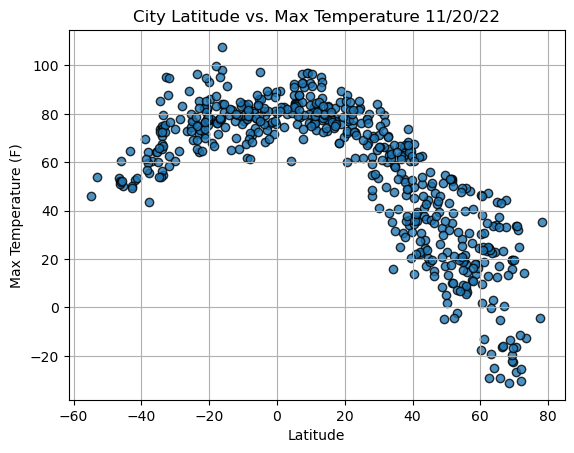

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

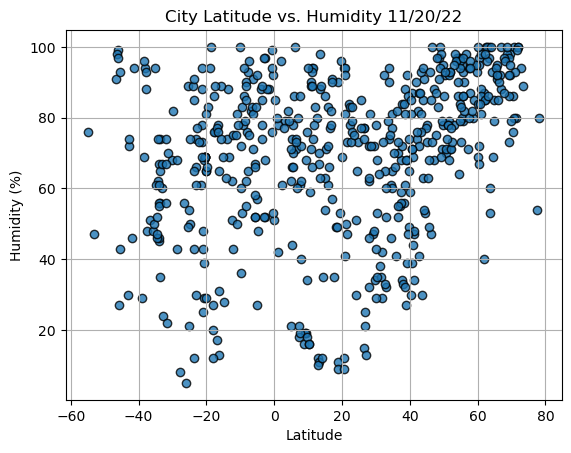

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

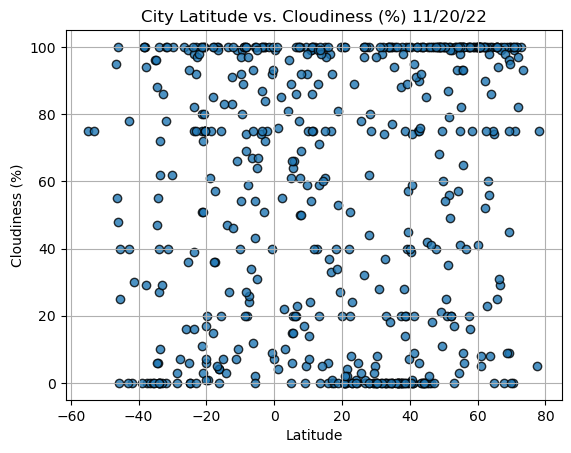

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

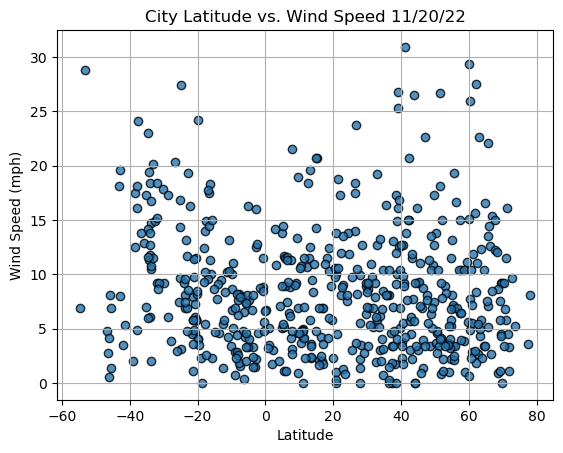

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                         Lebu
Country                        CL
Date          2022-11-20 14:23:45
Lat                      -37.6167
Lng                        -73.65
Max Temp                    55.69
Humidity                       48
Cloudiness                      0
Wind Speed                  24.07
Name: 13, dtype: object

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2022-11-20 14:23:40,70.6333,147.9167,-26.77,100,99,6.78
1,Mastung,PK,2022-11-20 14:23:41,29.7994,66.8450,53.51,34,5,6.31
3,Sinnamary,GF,2022-11-20 14:23:42,5.3833,-52.9500,84.45,66,15,11.70
4,Olafsvik,IS,2022-11-20 14:23:43,64.8945,-23.7142,43.77,79,74,16.53
6,Lompoc,US,2022-11-20 14:23:43,34.6391,-120.4579,47.59,65,0,10.36


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

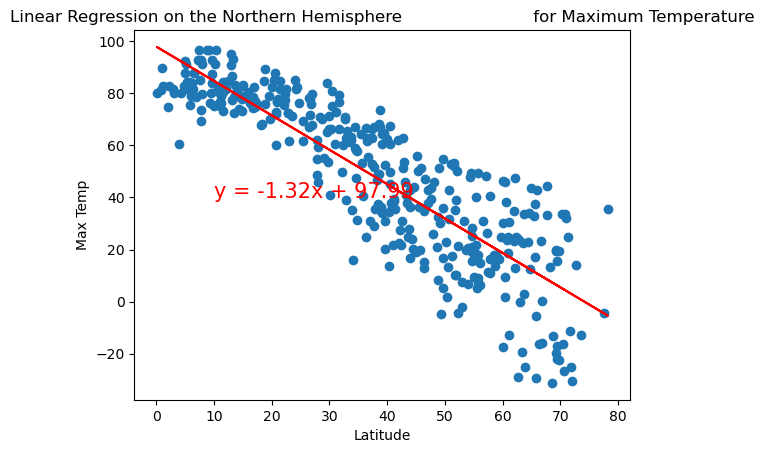

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

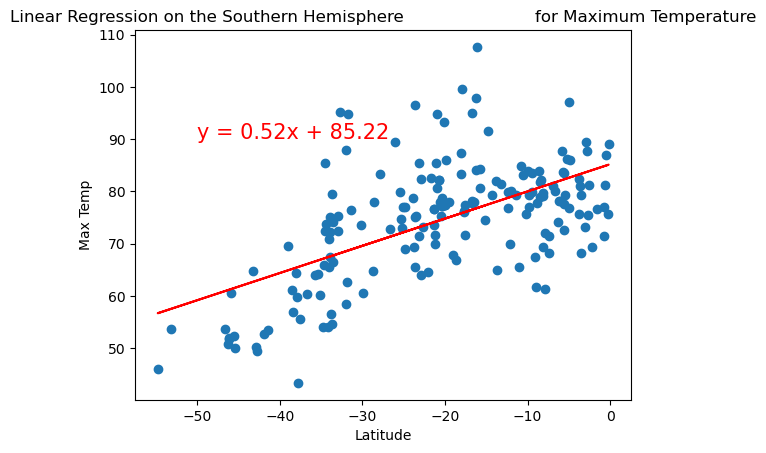

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

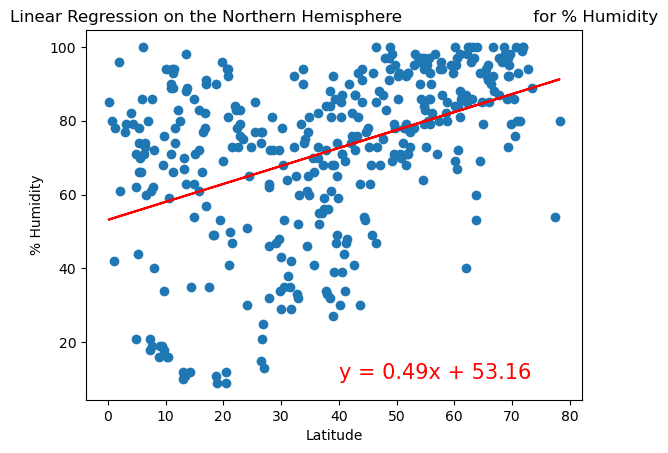

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

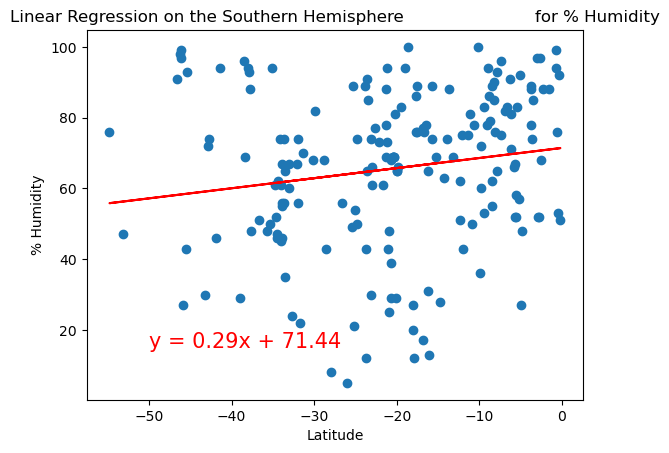

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

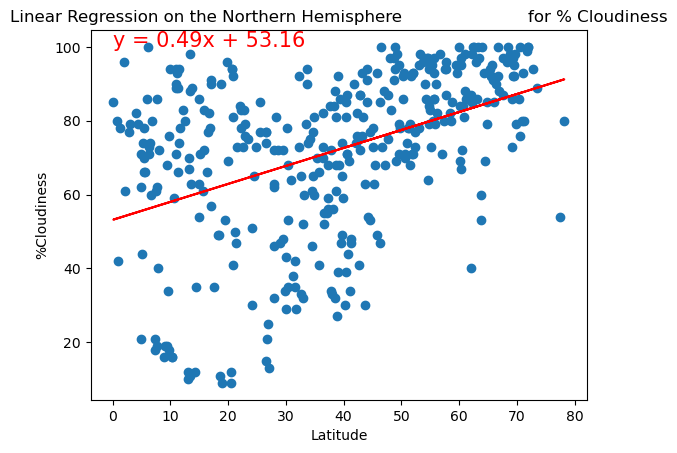

In [46]:
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_value, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness',  '%Cloudiness', (0,100))

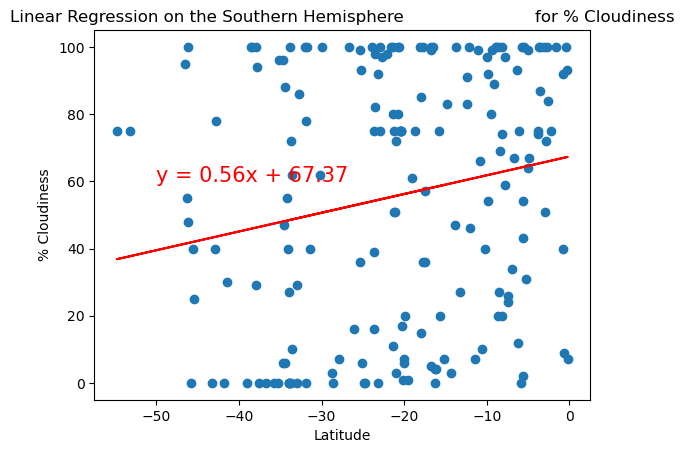

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

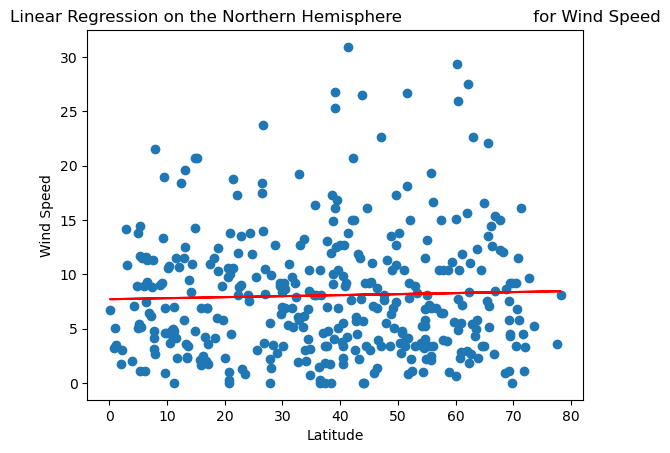

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

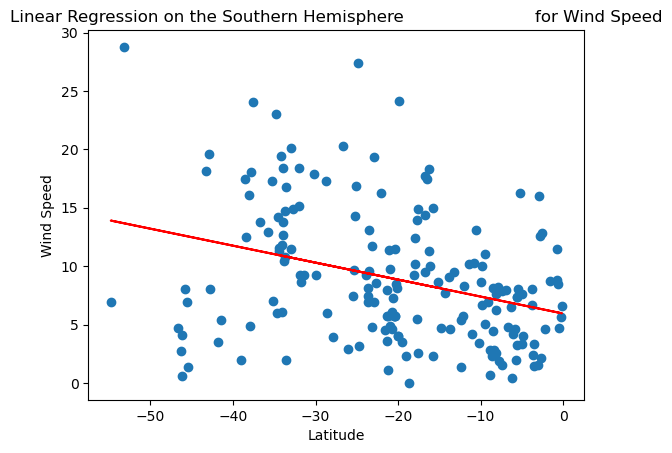

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))